# Part 3: Mixed Effects Models
<b>Author</b>: Sterling Cutler
<br>
<b>Date</b>: March 22, 2018

In the previous sections, we removed the claim number before fitting out data to the linear model. In doing so, we treated the dataset as a population when those select claims were truly a subset (sample) of the population. Fitting a model to a population of insurance data is most often infeasible and inefficient. Fitting a model to excessively large data can also lead to the problem of data dredging (or p-hacking), in which all the explanatory variables used in the model return significant when they often wouldn't be in practice.

When dealing with a variable that comes from a probability distribution, in which there are infinite possible values, we are dealing with a random variable. Random variables have their own impact on model residuals than fixed-effect variables, so it useful to use a model that can capture these differences. Mixed effects models allow us to model data with fixed and random variables. We could use a mixed model on our previous dataset and specify claim number as a random variable, but instead let's focus on a more practical demonstration of how an insurance analyst may look at certain locations.

In [1]:
# Load new dataset and inspect the data
library(insuranceData)

data(dataCar)
str(dataCar)
paste()
head(dataCar)

'data.frame':	67856 obs. of  11 variables:
 $ veh_value: num  1.06 1.03 3.26 4.14 0.72 2.01 1.6 1.47 0.52 0.38 ...
 $ exposure : num  0.304 0.649 0.569 0.318 0.649 ...
 $ clm      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ numclaims: int  0 0 0 0 0 0 0 0 0 0 ...
 $ claimcst0: num  0 0 0 0 0 0 0 0 0 0 ...
 $ veh_body : Factor w/ 13 levels "BUS","CONVT",..: 4 4 13 11 4 5 8 4 4 4 ...
 $ veh_age  : int  3 2 2 2 4 3 3 2 4 4 ...
 $ gender   : Factor w/ 2 levels "F","M": 1 1 1 1 1 2 2 2 1 1 ...
 $ area     : Factor w/ 6 levels "A","B","C","D",..: 3 1 5 4 3 3 1 2 1 2 ...
 $ agecat   : int  2 4 2 2 2 4 4 6 3 4 ...
 $ X_OBSTAT_: Factor w/ 1 level "01101    0    0    0": 1 1 1 1 1 1 1 1 1 1 ...


character(0)

veh_value,exposure,clm,numclaims,claimcst0,veh_body,veh_age,gender,area,agecat,X_OBSTAT_
1.06,0.3039014,0,0,0,HBACK,3,F,C,2,01101 0 0 0
1.03,0.6488706,0,0,0,HBACK,2,F,A,4,01101 0 0 0
3.26,0.5694730,0,0,0,UTE,2,F,E,2,01101 0 0 0
4.14,0.3175907,0,0,0,STNWG,2,F,D,2,01101 0 0 0
0.72,0.6488706,0,0,0,HBACK,4,F,C,2,01101 0 0 0
2.01,0.8542094,0,0,0,HDTOP,3,M,C,4,01101 0 0 0


#### Variables of Interest
Our target variable will be claim amount and our random variable will be area. The assumption of this study is that the six possible area levels are only a sample of all the levels available in the population, which is often the case. The fixed-effect variables we'll focus on in this case are vehicle value, vehicle body, vehicle age, driver's gender, and driver's age.

[1] "Vehicle Value:"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   1.010   1.500   1.777   2.150  34.560 

character(0)

[1] "Vehicle Body:"


  BUS CONVT COUPE HBACK HDTOP MCARA MIBUS PANVN RDSTR SEDAN STNWG TRUCK   UTE 
   48    81   780 18915  1579   127   717   752    27 22233 16261  1750  4586 

character(0)

[1] "Vehicle Age:"


    1     2     3     4 
12257 16587 20064 18948 

character(0)

[1] "Driver Gender:"


    F     M 
38603 29253 

character(0)

[1] "Driver Age:"


    1     2     3     4     5     6 
 5742 12875 15767 16189 10736  6547 

character(0)

[1] "Area:"


    A     B     C     D     E     F 
16312 13341 20540  8173  5912  3578 

character(0)

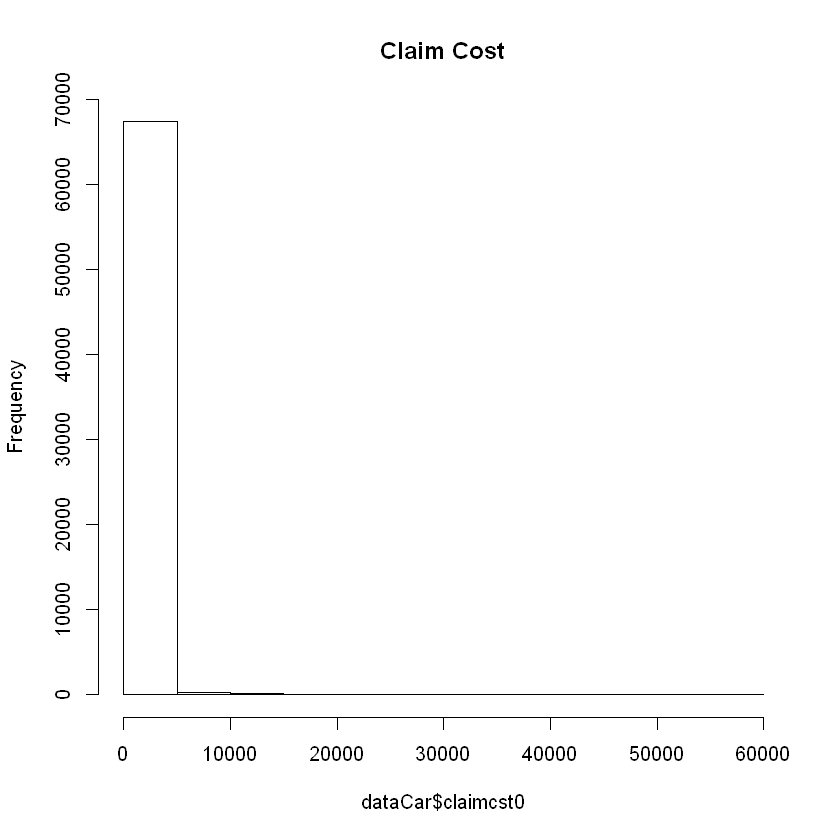

In [2]:
# View stats/values of explantory variables
paste('Vehicle Value:')
summary(dataCar$veh_value)
paste()
paste('Vehicle Body:')
table(dataCar$veh_body)
paste()
paste('Vehicle Age:')
table(dataCar$veh_age)
paste()
paste('Driver Gender:')
table(dataCar$gender)
paste()
paste('Driver Age:')
table(dataCar$agecat)
paste()
paste('Area:')
table(dataCar$area)
paste()
# View distribution of target variable
hist(dataCar$claimcst0, main='Claim Cost')

## Generalized Linear Mixed Effects Model (GLMM)

As we can see from the histogram above, our target variable does not have a normal distribution but rather a Poisson distribution. This is commonly seen in insurance for claim count and severity. If our target variable had a Gaussian distribution, we could use a linear mixed effects model (LME) or a Nonlinear Mixed Effect Model (NLME). 

However in the case of other exponential family distributions, we will consider the Generalized Mixed Effect Model (GLMM) which has the form: $y=X\beta + Z\mu + \epsilon$ where $X\beta$ represents the fixed-effects predictors variables and their regression coefficients and $Z\mu$ represents the random-effects variables and their complements to the regression coefficients. 

Because the GLMM does not have a closed-form solution, several packages in R use Monte Carlo simulations to approximate the maximum likelihood estimation (MLE) to determine the best model parameters. Here we will use ten simulations to keep computation costs low.

In [ ]:
suppressMessages(suppressWarnings(library(glmm)))

dataCar$target <- as.integer(dataCar$claimcst0)
glmm_model <- glmm(fixed=target ~ veh_value + veh_body,
                   random= ~ 0 + area,
                   varcomps.names=c('area'),
                   data=dataCar,
                   family.glmm=poisson.glmm,
                   m=10)

In [ ]:
## ... and here is where my computer crashes